In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller

In [157]:
Sales = "https://raw.githubusercontent.com/poornagurram/TimeSeriesAnalysis_ODSC_2019/master/data/AirPassengers.csv"
data=pd.read_csv(Sales)
data.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [158]:
data.shape

(144, 2)

In [159]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
dataset=data.set_index(['Month'])
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


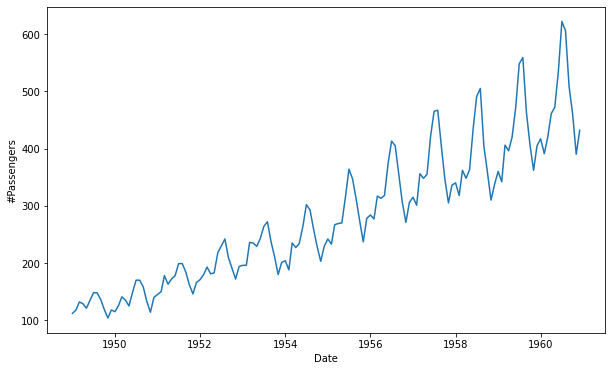

In [160]:
plt.xlabel('Date')
plt.ylabel('#Passengers')
plt.plot(dataset)

In [161]:
rollmean= dataset.rolling(window=12).mean()
rollstd= dataset.rolling(window=12).std()
print(rollmean, rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


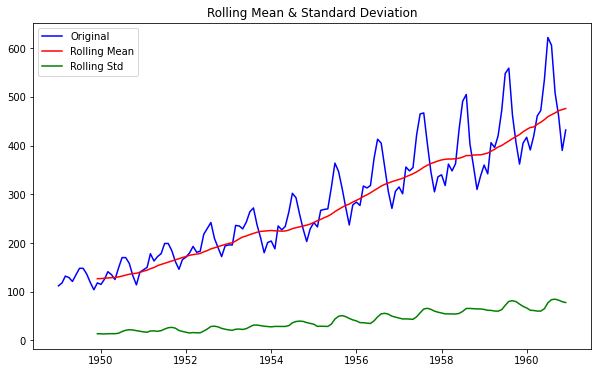

In [162]:
orig=plt.plot(dataset, color='blue', label='Original')
mean=plt.plot(rollmean, color='red', label='Rolling Mean')
std=plt.plot(rollstd, color='green', label ='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [163]:
#Dickey–Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey–Fuller Test')
dftest=adfuller(dataset['#Passengers'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s), ' %key] = value
print(dfoutput)

Results of Dickey–Fuller Test
Test Statistic              0.815369
p-value                     0.991880
#Lags Used                 13.000000
#Observations Used        130.000000
Critical Value (1%),       -3.481682
Critical Value (5%),       -2.884042
Critical Value (10%),      -2.578770
dtype: float64


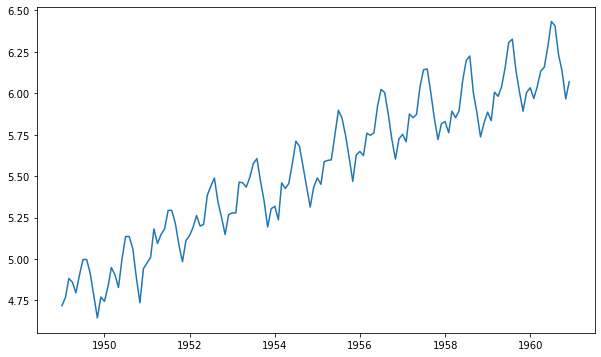

In [164]:
dataset_logscale = np.log(dataset)
plb.plot(dataset_logscale)

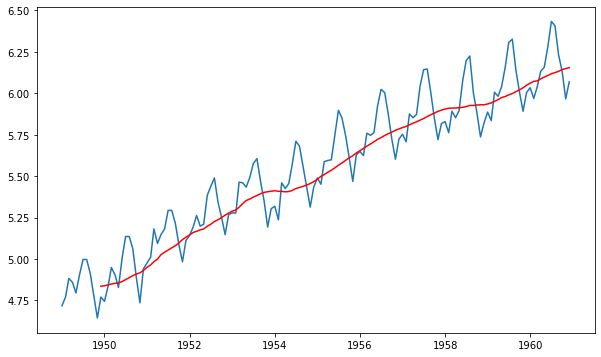

In [165]:
rollmean2= dataset_logscale.rolling(window=12).mean()
rollstd2= dataset_logscale.rolling(window=12).std()
plt.plot(dataset_logscale)
plt.plot(rollmean2, color='red')

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = timeseries.rolling(window=12,center=False).mean()
  rolstd = timeseries.rolling(window=12,center=False).std()
  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='green', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  

  #Perform Dickey-Fuller test:
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s), ' %key] = value
  print(dfoutput)

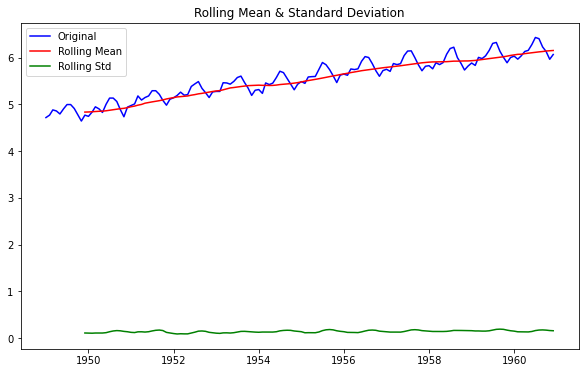

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%),            -3.481682
Critical Value (5%),            -2.884042
Critical Value (10%),           -2.578770
dtype: float64


In [167]:
test_stationarity(dataset_logscale['#Passengers'])

In [168]:
dataset_logscale_minus_MA = dataset_logscale - rollmean2
dataset_logscale_minus_MA.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [169]:
dataset_logscale_minus_MA.dropna(inplace=True)
dataset_logscale_minus_MA.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


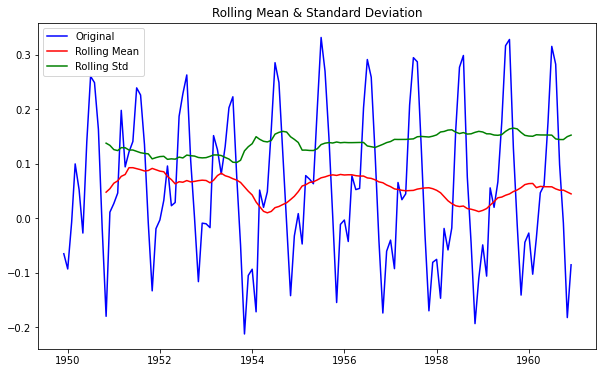

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%),            -3.486535
Critical Value (5%),            -2.886151
Critical Value (10%),           -2.579896
dtype: float64


In [170]:
test_stationarity(dataset_logscale_minus_MA['#Passengers'])

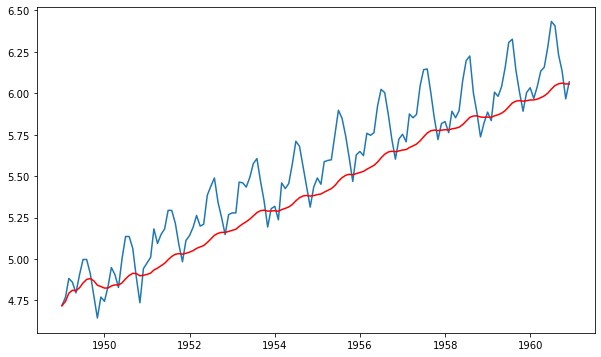

In [171]:
ExponentialDecayWeightedAverage = dataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(dataset_logscale)
plt.plot(ExponentialDecayWeightedAverage, color='red')

In [172]:
dataset_logscale_minus_ExpDecayMA = dataset_logscale - ExponentialDecayWeightedAverage
dataset_logscale_minus_ExpDecayMA.head()

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.025339
1949-03-01,0.088967
1949-04-01,0.048028
1949-05-01,-0.012415


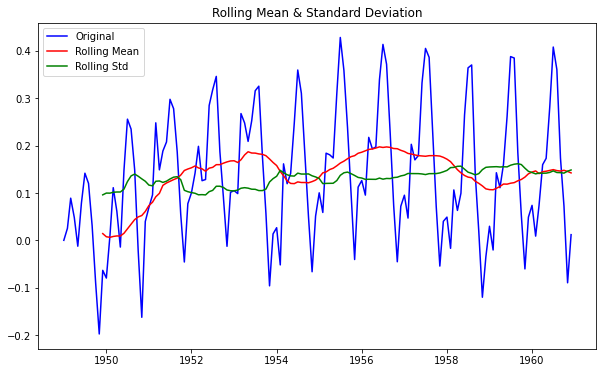

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%),            -3.481682
Critical Value (5%),            -2.884042
Critical Value (10%),           -2.578770
dtype: float64


In [173]:
from statsmodels.tsa.stattools import adfuller
test_stationarity(dataset_logscale_minus_ExpDecayMA['#Passengers'])

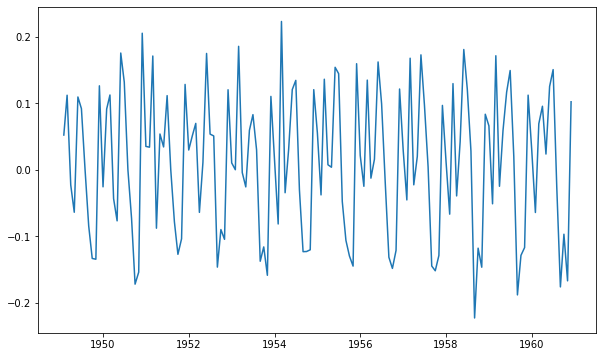

In [174]:
dataset_logscale_minus_shift = dataset_logscale - dataset_logscale.shift()
plt.plot(dataset_logscale_minus_shift)

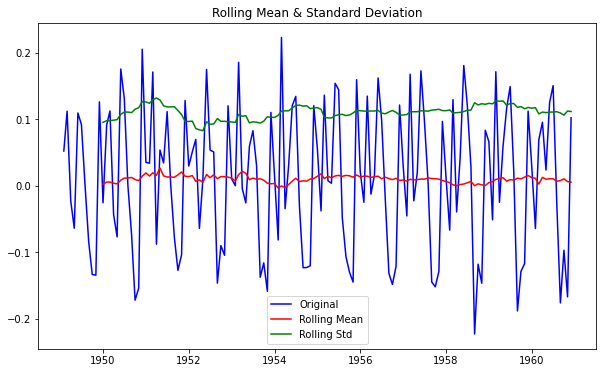

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%),            -3.482501
Critical Value (5%),            -2.884398
Critical Value (10%),           -2.578960
dtype: float64


In [175]:
dataset_logscale_minus_shift.dropna(inplace=True)
test_stationarity(dataset_logscale_minus_shift['#Passengers'])

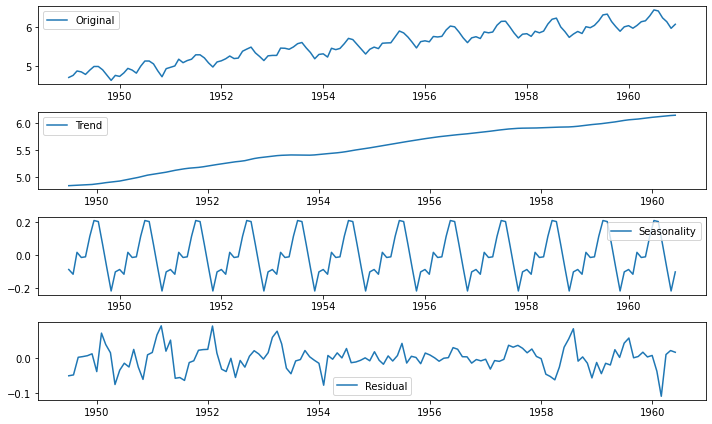

In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_logscale)

trend = decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(dataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

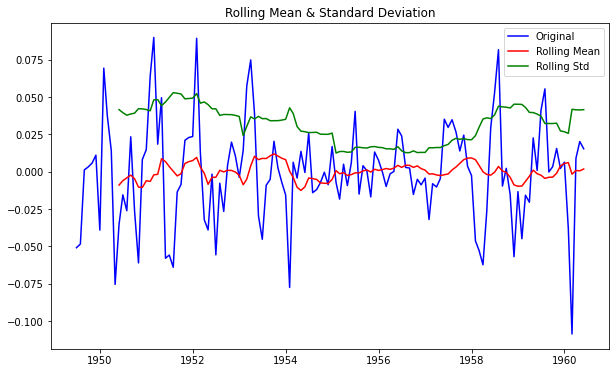

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%),          -3.485122e+00
Critical Value (5%),          -2.885538e+00
Critical Value (10%),         -2.579569e+00
dtype: float64


In [177]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData['#Passengers'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


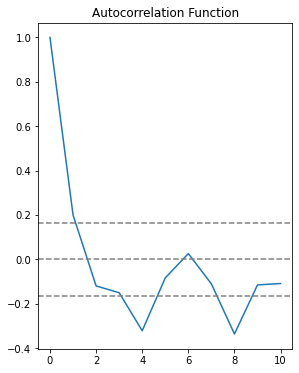

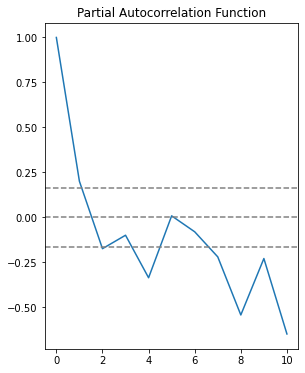

In [178]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dataset_logscale_minus_shift, nlags = 10)
lag_pacf = pacf(dataset_logscale_minus_shift, nlags=10, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_logscale_minus_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_logscale_minus_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_logscale_minus_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_logscale_minus_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


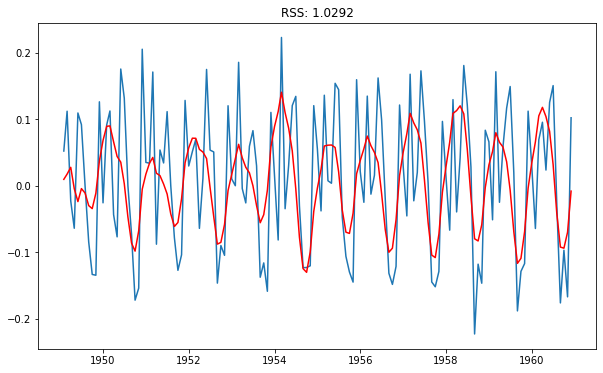

In [179]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model= ARIMA(dataset_logscale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dataset_logscale_minus_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataset_logscale_minus_shift['#Passengers'])**2))
print("Plotting AR Model")

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


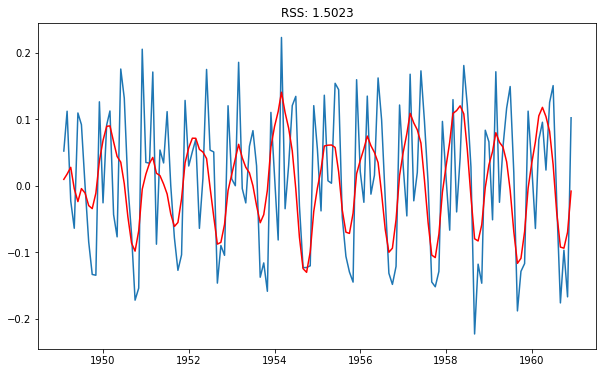

In [180]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model
model= ARIMA(dataset_logscale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(dataset_logscale_minus_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - dataset_logscale_minus_shift['#Passengers'])**2))
print("Plotting MA Model")

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


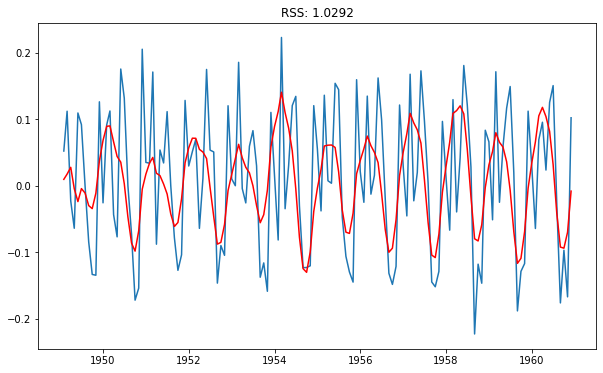

In [181]:
from statsmodels.tsa.arima_model import ARIMA
#ARIMA Model
model= ARIMA(dataset_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataset_logscale_minus_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - dataset_logscale_minus_shift['#Passengers'])**2))
print("Plotting AR Model")

In [182]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [183]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [188]:
predictions_ARIMA_log = pd.Series(dataset_logscale['#Passengers'].iloc[0], index=dataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

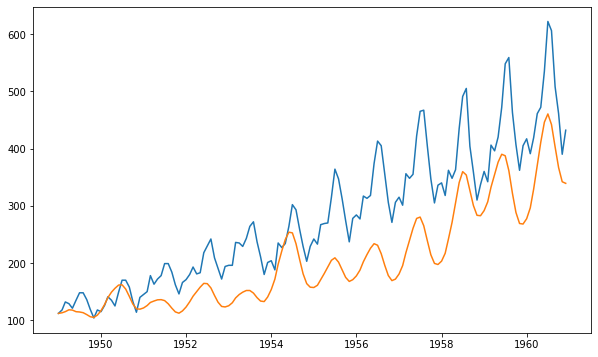

In [193]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataset)
plt.plot(predictions_ARIMA)

array([0.08384711, 0.10749461, 0.11568694, 0.11702774, 0.11703496,
       0.11744017, 0.11762249, 0.11778712, 0.12024162, 0.12736043,
       0.13870961, 0.15118794, 0.16157815, 0.16834396, 0.1717733 ,
       0.17311982, 0.17358732, 0.17385459, 0.17430217, 0.17543332,
       0.17788148, 0.18195723, 0.18726219, 0.19283395, 0.19769247,
       0.20130641, 0.20369057, 0.20519834, 0.2062527 , 0.20721   ,
       0.20836972, 0.21000328, 0.21229746, 0.21524481, 0.21860182,
       0.22198259, 0.22503067, 0.22755298, 0.22954809, 0.231148  ,
       0.23253828, 0.23390536, 0.23541312, 0.23718314, 0.23926541,
       0.24161541, 0.24410374, 0.2465636 , 0.24885259, 0.25089632,
       0.25269736, 0.25431631, 0.25584315, 0.25737231, 0.25898393,
       0.26072853, 0.26261551, 0.26461092, 0.26664901, 0.26865484])

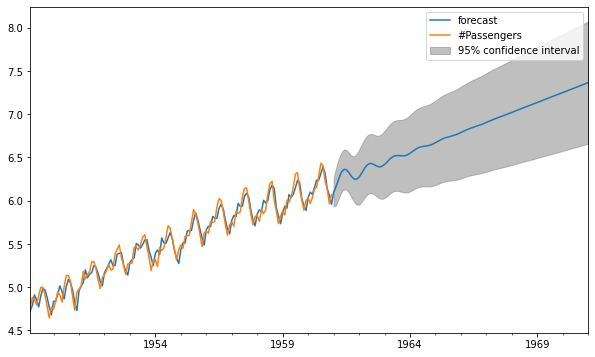

In [194]:
results_ARIMA.plot_predict(1, 264)
forcast=results_ARIMA.forecast(steps=60)


In [0]:
forcast